---
# Pre-processing
---

To deal with text data in the raw posts, the following processes will be employed:
- Tokenizing
- Lemmatizing & Stemming 

### Imports and load file

In [18]:
# library imports
import requests
import time
import pandas as pd
import numpy as np
import re

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup  
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Import combined data
df = pd.read_csv('./dataset/df.csv')

---
### Inspect the data

In [3]:
df.head()

,title,post,author,upvotes,downvotes,is_sw,comb
0,New wiki on how to avoid accidentally encourag...,We've been seeing a worrying increase in pro-s...,t2_1t70,1728,0,0,New wiki on how to avoid accidentally encourag...
1,Reminder: Absolutely no activism of any kind i...,"If you want to recognise an occasion, please d...",t2_1t70,1216,0,0,Reminder: Absolutely no activism of any kind i...
2,Haha help,"Yes, I am suicidal. Yes, I am ""getting help"". ...",t2_u5zigd9,158,0,0,"Haha help Yes, I am suicidal. Yes, I am ""getti..."
3,Someone please talk to me😢 anyone at all please,"I have absolutely no one to turn to, I feel so...",t2_5a7y2qvy,113,0,0,Someone please talk to me😢 anyone at all pleas...
4,I'm usually responding to these posts,I don't feel like I shouldn't be posting this ...,t2_5w7amdt9,32,0,0,I'm usually responding to these posts I don't ...


In [4]:
# View data within cell of 'comb' column
df['comb'][2]

'Haha help Yes, I am suicidal. Yes, I am "getting help". Posted on mobile.\n\n I don\'t believe in an afterlife or religion. I only believe in the void after death, where my conciousness ends. With that in mind, dying doesn\'t seem so bad to me, in fact it\'s very attractive, especially since I can\'t imagine myself doing anything productive with my life, or getting a good ending. I think that if I die now, I will stop all possibilities of all problems from affecting me and making me upset. I also believe that even if I was happy or successful, none of that would mean anything in the time frame of the life of the planet, much less the universe. With no knowledge of my personal life or my abilities or personality, I feel that nobody will be able to prove to me that I am unjustified in killing myself. I have had many people make the argument "your family and friends will be sad". My reasoning is this: in the void, my conciousness, and by extension, my conscience ceases to exist. This mea

In [5]:
len(df['comb'])

1909

In [6]:
df['is_sw'].value_counts()

0    983
1    926
Name: is_sw, dtype: int64

In [7]:
df['comb'] = df['comb'].str.lower()

---
- Prior to combining the data frames, initial cleaning steps were taken to remove duplicate posts. Following which, a total of 1909 posts remained in total, with 983 posts from r/depression, and 926 posts from r/SuicideWatch. These posts contain numbers, emojis and HTML code artifacts(characters).


---
### 1. Stemming & Lemmatizing 

These functions serves to:

- remove punctuation,
- remove stopwords,
- stem & lemmatize each word of the text.

The functions should receive one string of text and return the processed text.


#### Stemming words in df.comb

- Using stemmer to improve the modeling ability of strings which trims characters from each word to convert it to a stem. Similar words will register as equivalent during feature extraction if they share a stem, returning a base form of the word (i.e., computer/computing/computed all result in a stem 'comput'). It tends to be cruder than using lemmatization.

In [8]:
# function to extract only words from combined post and titles
def text_to_words_stem(raw_text):
    new_list = []
    ps = PorterStemmer()    
    for i in range(len(raw_text)):
        
        # remove non-letters
        letters_only = re.sub("[^a-zA-Z]", " ", raw_text[i]) 
        
        # convert to lower case, split into individual words
        words = letters_only.lower().split() 
        
        # convert stop words to a set
        stops = set(stopwords.words('english')) 
        
        # remove stop words
        meaningful_words = [w for w in words if not w in stops]
        
        # stemmed words
        meaningful_words_lem = [ps.stem(i) for i in meaningful_words]
        
        # append lemmas to list
        string_clean = " ".join(meaningful_words_lem)
        new_list.append(string_clean)
        
    return new_list

In [9]:
# creating new column and initialize function to get words only
df['cleaned_post_stem'] = text_to_words_stem(df['comb'])

In [10]:
# check length of 1 example combined post and title for stem
len(df['cleaned_post_stem'][0])

5921

In [31]:
# check new column
df['cleaned_post_stem'].head()

0    new wiki avoid accident encourag suicid spot c...
1    remind absolut activ kind allow day want recog...
2    haha help ye suicid ye get help post mobil bel...
3    someon pleas talk anyon pleas absolut one turn...
4    usual respond post feel like post lot peopl ne...
Name: cleaned_post_stem, dtype: object

#### Lemmatizing words in df.comb

- Lemmatizing is a precise way of handling things from a grammatical/morphological point of view, but also might not have much of an effect. Words attempt to return their lemma, or the base/dictionary form of a word.

In [11]:
# function to extract only words from combined post and titles
def text_to_words_lem(raw_text):
    new_list = []
    lemmatizer = WordNetLemmatizer()
    
    for i in range(len(raw_text)):
        
        # remove non-letters
        letters_only = re.sub("[^a-zA-Z]", " ", raw_text[i]) 
        
        # convert to lower case, split into individual words
        words = letters_only.lower().split() 
        
        # convert stop words to a set
        stops = set(stopwords.words('english')) 
        
        # remove stop words
        meaningful_words = [w for w in words if not w in stops]
        
        # lemmatize words
        meaningful_words_lem = [lemmatizer.lemmatize(i) for i in meaningful_words]
        
        # append lemmas to list
        string_clean = " ".join(meaningful_words_lem)
        new_list.append(string_clean)
        
    return new_list

In [13]:
# creating new column and initialize function to get words only
df['cleaned_post_lem'] = text_to_words_lem(df['comb'])

In [14]:
# check length of 1 example combined post and title for lem
len(df['cleaned_post_lem'][0])

6881

In [26]:
# check new column
df['cleaned_post_lem'].head()

0    new wiki avoid accidentally encouraging suicid...
1    reminder absolutely activism kind allowed day ...
2    haha help yes suicidal yes getting help posted...
3    someone please talk anyone please absolutely o...
4    usually responding post feel like posting lot ...
Name: cleaned_post_lem, dtype: object

#### Create word clouds for stemmed and lemmatized words for visual comparison

In [27]:
# From https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

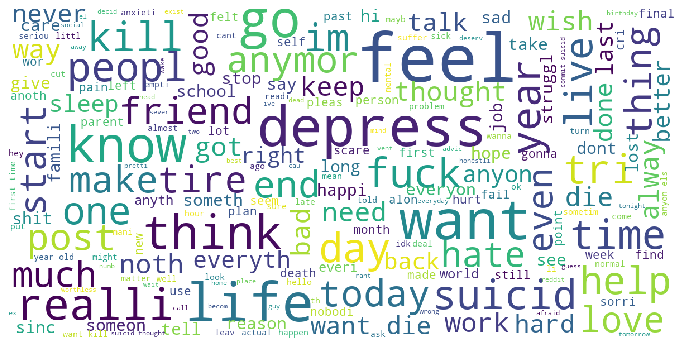

In [29]:
# Plotting wordcloud for combined posts cleaned by stemming method
show_wordcloud(df.cleaned_post_stem)

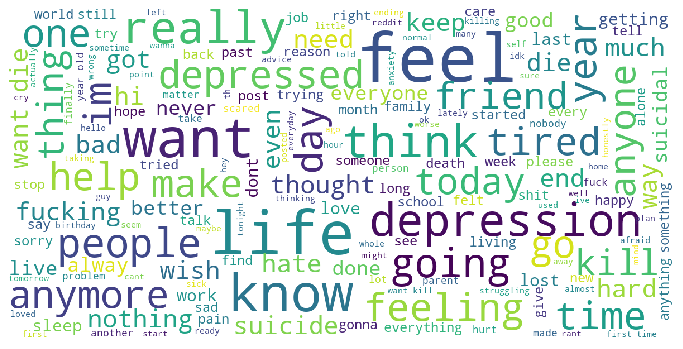

In [30]:
# Plotting wordcloud for combined posts cleaned by lemmatizing method
show_wordcloud(df.cleaned_post_lem)

Lemmatizing produced 6881 feature(words) while stemming produced 5921; a loss of 960 words. Based on a visual comparison of the wordclouds, though both share similar words, lemmatizing was the better function as it was less harsh and did not result in possibly altering the meaning of words (e.g. 'realli', 'everyth'). 

In [ ]:
# rmb to include count of how many feature words were eliminated by using stem and lem.

---
#### Save new combined DataFrame

- This DataFrame table containing target vector is_sw, posts cleaned by lemmatizing and stemming.

In [ ]:
# creating new DataFrame for lem and stem words
df_clean = df.drop(['title', 'post', 'author', 'upvotes', 'downvotes', 'comb'], axis=1)

In [ ]:
df_clean.isnull().sum()

In [ ]:
# save cleaned data to csv
df_clean.to_csv('./dataset/df_clean.csv', index=False)

---